In [8]:
import os
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import napari

import sys
sys.path.append(r'../')

from tools import imgLoad
from SegTools import Blocks, Segmentation

# Load data

In [9]:
basedir = r"Y:\People\Yannan\Segmentation\DrugTH10_30mgkg\CSal111822"
probTH = imgLoad.loadVirtualTifSeq(basedir + r"\regionSpecificTraining\roiProb\*.tif")
imgTH = imgLoad.loadVirtualTifSeq(basedir + r"\regionSpecificTraining\img\*.tif")

masks = [imgLoad.loadVirtualTifSeq(r"W:\People\Yannan\Segmentation\DF16\regionalMask\aroundHY\highDenseMask2\*.tif"),
        imgLoad.loadVirtualTifSeq(r"W:\People\Yannan\Segmentation\DF16\regionalMask\aroundHY\aroundHYMask\*.tif")]

(2192, 1776, 750)
(2192, 1776, 750)
(2192, 1776, 750)
(2192, 1776, 750)


# Set blocks

Block Number (x,y,z):  [3 2 4]


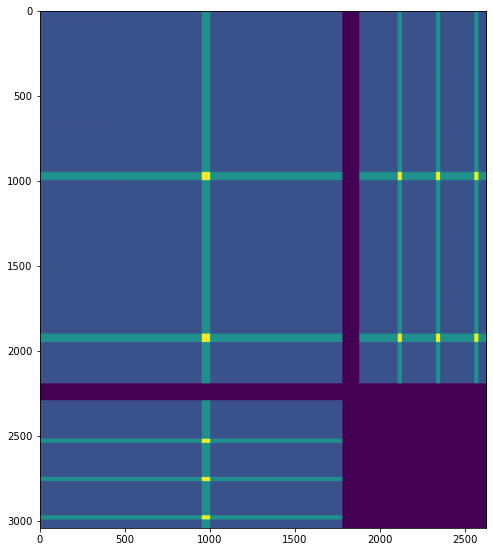

In [10]:
blocks = Blocks(probTH.shape, (1000, 1000, 250), (50, 50, 25))
blocks.visualize()

In [11]:
segObj = Segmentation(imgTH, probTH, masks, blocks)

# Tune thresholds

In [ ]:
# (1,0,0), (0,0,1), (1,0,1), (1,0,2)

thresholds = [0.02, 0.1]
blobs = segObj.segmentBlock([1,0,0], thresholds)

Load data...
Blob detection (Mask 1)...
Detection: 0
Blob detection (Mask 2)...


In [27]:
%gui qt

viewer = napari.view_image(segObj.blockImg, contrast_limits=[0,8000], colormap = 'gray', order = [2, 0, 1], name = 'Img')
viewer.add_image(segObj.blockProb, contrast_limits=[0,255], colormap = 'red', blending = 'additive', name = 'Prob')
viewer.add_image(segObj.blockMasks[1], contrast_limits=[0,1], colormap = 'green', blending = 'additive', opacity = 0.3, name = 'Mask')
viewer.add_image(segObj.blockMasks[0], contrast_limits=[0,1], colormap = 'cyan', blending = 'additive', opacity = 0.3, name = 'Mask')
viewer.add_points(np.array([blobs.x, blobs.y, blobs.z]).T, size = 4, n_dimensional = True, face_color = 'red', name = 'colocal')


<Points layer 'colocal' at 0x1dc69b739d0>

# Run segmentation

In [5]:

allBlobs = segObj.segmentWhole(basedir, thresholds, subdir = r'\regionSpecificTraining', paramFile = 'denseBlobParam')
allBlobs.to_csv(basedir + r"\regionSpecificTraining\results.csv")


Exists  Y:\People\Yannan\Segmentation\DrugTH10_30mgkg\CKet112322\regionSpecificTraining\blocks
Exists  Y:\People\Yannan\Segmentation\DrugTH10_30mgkg\CKet112322\parameters

===
Block:  0 0 0
Load data...
Blob detection (Mask 1)...
Detection: 23
Blob detection (Mask 2)...
Detection: 2534

===
Block:  1 0 0
Load data...
Blob detection (Mask 1)...
Detection: 0
Blob detection (Mask 2)...
Detection: 1617

===
Block:  2 0 0
Load data...
Blob detection (Mask 1)...
Detection: 0
Blob detection (Mask 2)...
Detection: 0

===
Block:  0 1 0
Load data...
Blob detection (Mask 1)...
Detection: 15
Blob detection (Mask 2)...
Detection: 747

===
Block:  1 1 0
Load data...
Blob detection (Mask 1)...
Detection: 0
Blob detection (Mask 2)...
Detection: 913

===
Block:  2 1 0
Load data...
Blob detection (Mask 1)...
Detection: 0
Blob detection (Mask 2)...
Detection: 0

===
Block:  0 0 1
Load data...
Blob detection (Mask 1)...
Detection: 653
Blob detection (Mask 2)...
Detection: 755

===
Block:  1 0 1
Load data.

In [6]:
# allBlobs = segObj.loadBlockResults(basedir)
# allBlobs.to_csv(basedir + r"\results.csv")
allBlobs

,x,y,z,rx,ry,rz,mask
23,850.0,966.0,54.0,2.0,2.0,1.0,2.0
24,642.0,940.0,176.0,2.0,2.0,1.0,2.0
25,745.0,620.0,68.0,2.0,2.0,1.0,2.0
27,826.0,960.0,50.0,2.0,2.0,1.0,2.0
28,909.0,961.0,55.0,2.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...
19,1748.0,988.0,700.0,2.0,2.0,1.0,2.0
0,2064.0,1421.0,738.0,2.0,2.0,1.0,2.0
1,2026.0,1512.0,745.0,2.0,2.0,1.0,2.0
2,2068.0,1415.0,747.0,2.0,2.0,1.0,2.0


In [7]:
%gui qt

viewer = napari.view_image(imgTH, contrast_limits=[0,10000], colormap = 'gray',  scale = [1,1,2], name = 'Img')
viewer.add_points(np.array([allBlobs.x, allBlobs.y, allBlobs.z*2]).T, size = 15,\
                  symbol='ring', edge_width=0, \
                  n_dimensional = True, face_color = 'red', name = 'Cells')



<Points layer 'Cells' at 0x1dadcd22cd0>